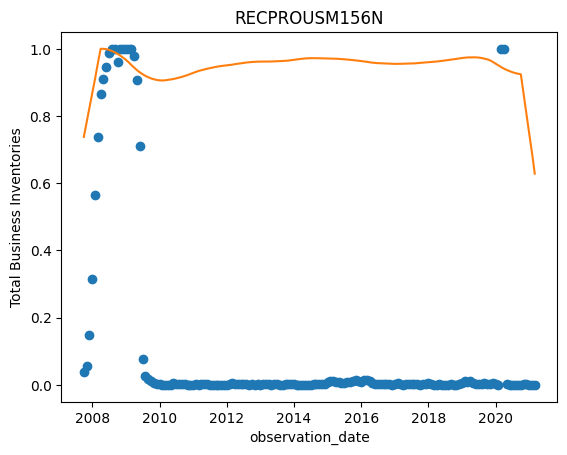

In [1]:
#Total Business Inventories
import os
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

tList = []
my_path="data/"
colNames = ["ICSA","DCOILWTICO","ANXAVS_NEWORDER","RECPROUSM156N","SAHMREALTIME","AWHAE","UMCSENT","BUSINV","PCEC96","UNRATE","ALTSALES","W875RX1","RRSFS","HOUST","DSPIC96","INDPRO","PAYEMS"]
# Storing data in Lists
skiplist = list(range(0, 10))
for i in os.listdir(my_path):
    fPath = my_path + i
    tList.append(pd.read_excel(fPath, skiprows=skiplist))
df = tList[7]
df_1 = df[colNames[7]]
df2 = tList[3]
df2_1 = df2[colNames[3]]

# rolling average
roll = np.convolve(df_1, np.ones(12),'same')/12
roll2= np.convolve(roll, np.ones(12),'same')/12

dates=np.arange(0,162)
m, b = np.polyfit(dates, roll, 1)
# r-value
df_1_roll = roll-m*dates+b
r = np.corrcoef(df_1_roll,df2_1[0:162])


# Plot
plt.plot(df['observation_date'],df2_1[0:162]/np.max(df2_1[0:162]),'o')
plt.title(colNames[3])
plt.xlabel('observation_date')
plt.ylabel('Total Business Inventories')
plt.plot(df['observation_date'],df_1_roll/np.max(df_1_roll))
#plt.scatter(df["observation_date"], roll2)
plt.show()
